# 1. Import Data and required Packages

### Importing necessary libraries

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing .csv Data as Pandas DataFrame

In [108]:
df = pd.read_csv('data/stud.csv')

### Show top 5 records

In [109]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Show the shape of the dataset

In [110]:
df.shape

(1000, 8)

# 2. Dataset Information



- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score



# 3. Data Checks to perform

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values in each column
- Check statistics of data set
- Check various categories present in the different categorical columns

## 3.1 Check missing values

In [111]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no missing values in the dataset

## 3.2 Check duplicates

In [112]:
df.duplicated().sum()

0

### No duplicates present

## 3.3 Check data types

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check the number of unique values of each column

In [114]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 Check Statistics

In [115]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- All the means are very close to each other - b/w 66 and 69
- The standard deviation is also very similar - 14 - 15
- The minimum score of math is 0, whereas of writing is 10, and reading is even higher 17

## 3.6 Exploring Data

In [116]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [117]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [118]:
# define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']


print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.7 Adding "total_score" and "average" columns

In [119]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [120]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()


print(f"The no. of students who got full marks in writing: {writing_full}")
print(f"The no. of students who got full marks in reading: {reading_full}")
print(f"The no. of students who got full marks in math: {math_full}")

The no. of students who got full marks in writing: 14
The no. of students who got full marks in reading: 17
The no. of students who got full marks in math: 7


In [121]:
math_low = df[df['math score'] < 20]['average'].count()
reading_low = df[df['reading score'] < 20]['average'].count()
writing_low = df[df['writing score'] < 20]['average'].count()


print(f"The no. of students who got less than 20 marks in writing: {writing_low}")
print(f"The no. of students who got less than 20 marks in reading: {reading_low}")
print(f"The no. of students who got less than 20 marks in math: {math_low}")

The no. of students who got less than 20 marks in writing: 3
The no. of students who got less than 20 marks in reading: 1
The no. of students who got less than 20 marks in math: 4


### Insights
- Best performance in reading
- Worst performance in math

# 4. Visualizing Data

## 4.1 Histogram and Kernel Distribution Function

### Histogram + KDE

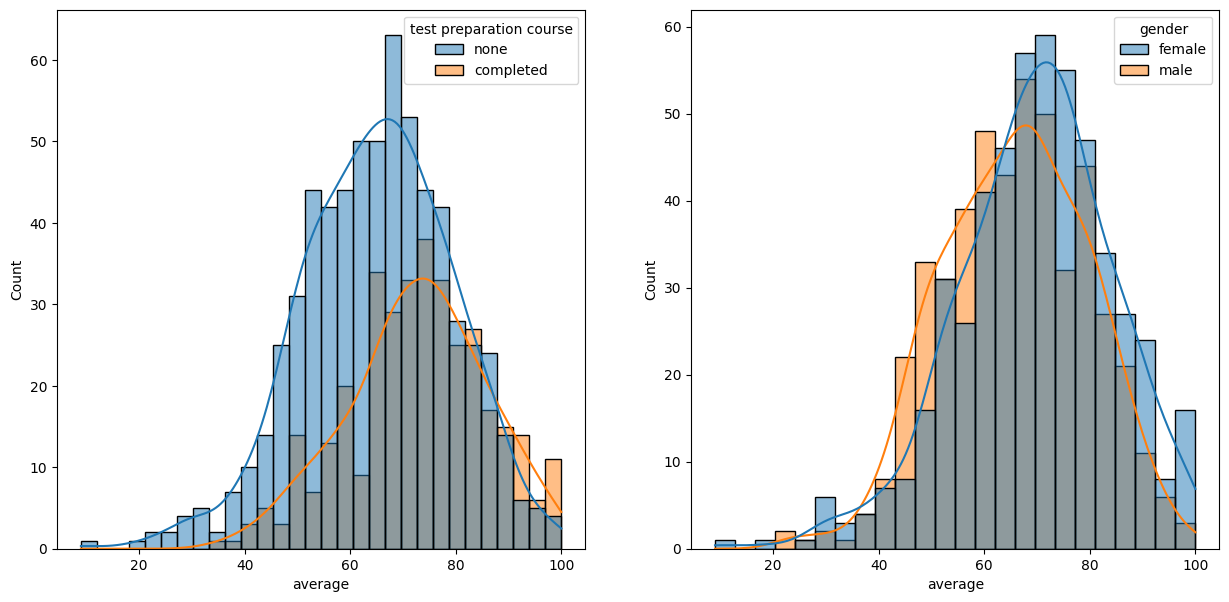

In [122]:
plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, bins=30, x='average', kde = True, hue='test preparation course')
plt.subplot(1, 2, 2)
sns.histplot(data = df, x='average', kde = True, hue='gender')
plt.show()

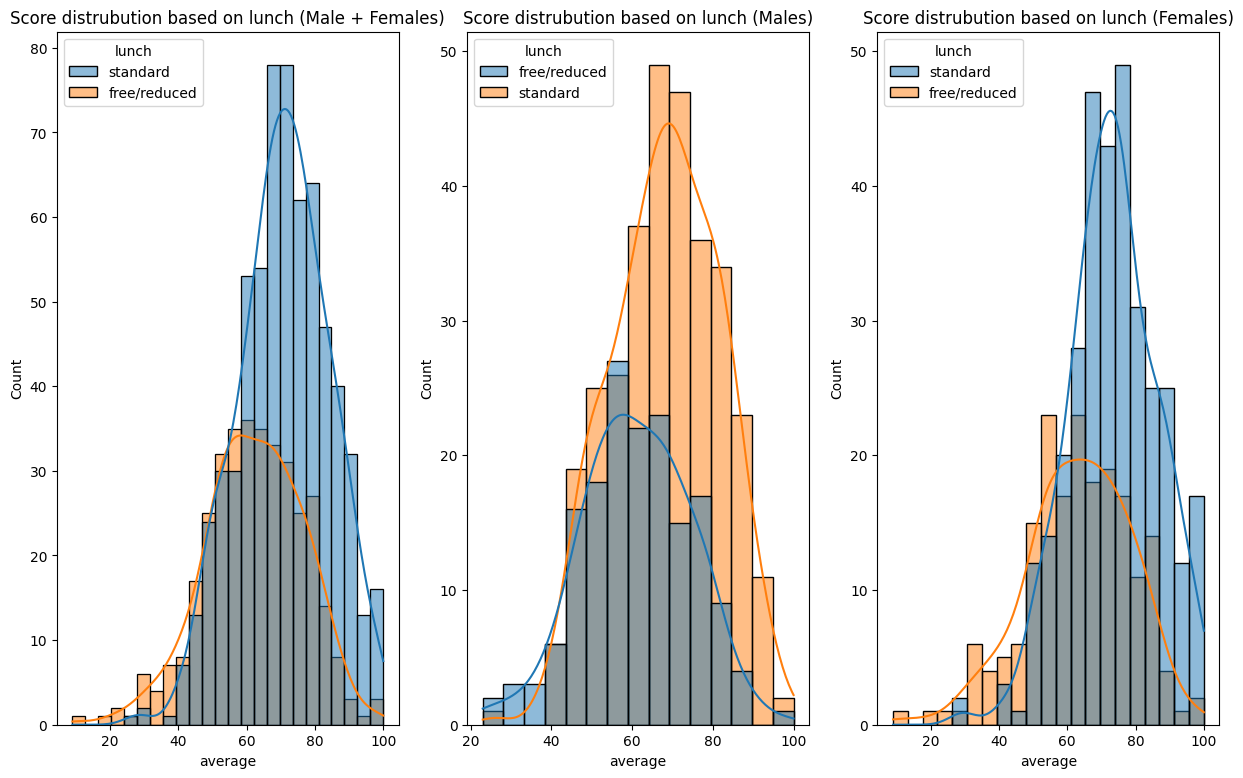

In [123]:
plt.subplots(1,3, figsize = (15,9))
plt.subplot(1,3,1)
ax = sns.histplot(data = df, x = 'average', kde=True, hue='lunch')
ax.set_title('Score distrubution based on lunch (Male + Females)')
plt.subplot(1,3,2)
ax = sns.histplot(data = df[df['gender']=='male'], x = 'average', kde=True, hue='lunch')
ax.set_title('Score distrubution based on lunch (Males)')
plt.subplot(1,3,3)
ax = sns.histplot(data = df[df['gender']=='female'], x = 'average', kde=True, hue='lunch')
ax.set_title('Score distrubution based on lunch (Females)')
plt.show()

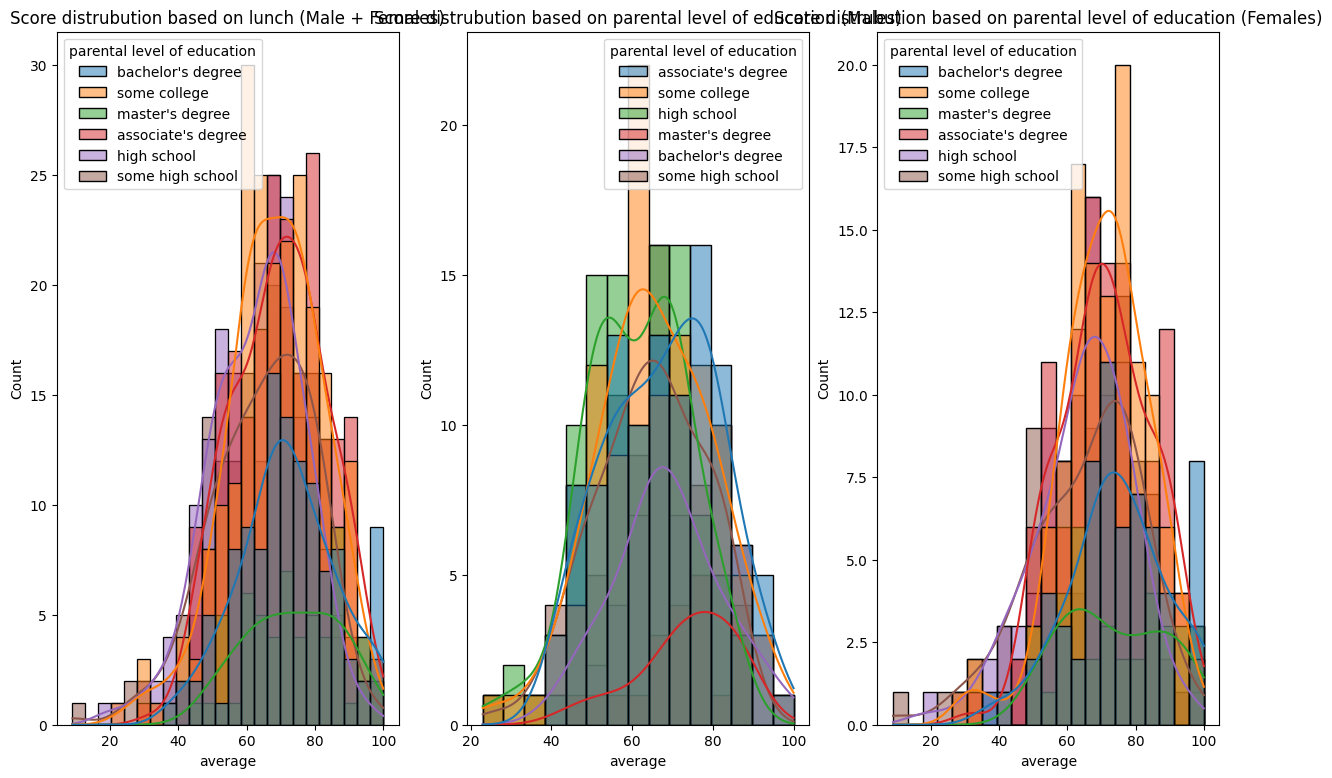

In [124]:
plt.subplots(1,3, figsize = (15,9))
plt.subplot(1,3,1)
ax = sns.histplot(data = df, x = 'average', kde=True, hue='parental level of education')
ax.set_title('Score distrubution based on lunch (Male + Females)')
plt.subplot(1,3,2)
ax = sns.histplot(data = df[df['gender']=='male'], x = 'average', kde=True, hue='parental level of education')
ax.set_title('Score distrubution based on parental level of education (Males)')
plt.subplot(1,3,3)
ax = sns.histplot(data = df[df['gender']=='female'], x = 'average', kde=True, hue='parental level of education')
ax.set_title('Score distrubution based on parental level of education (Females)')
plt.show()

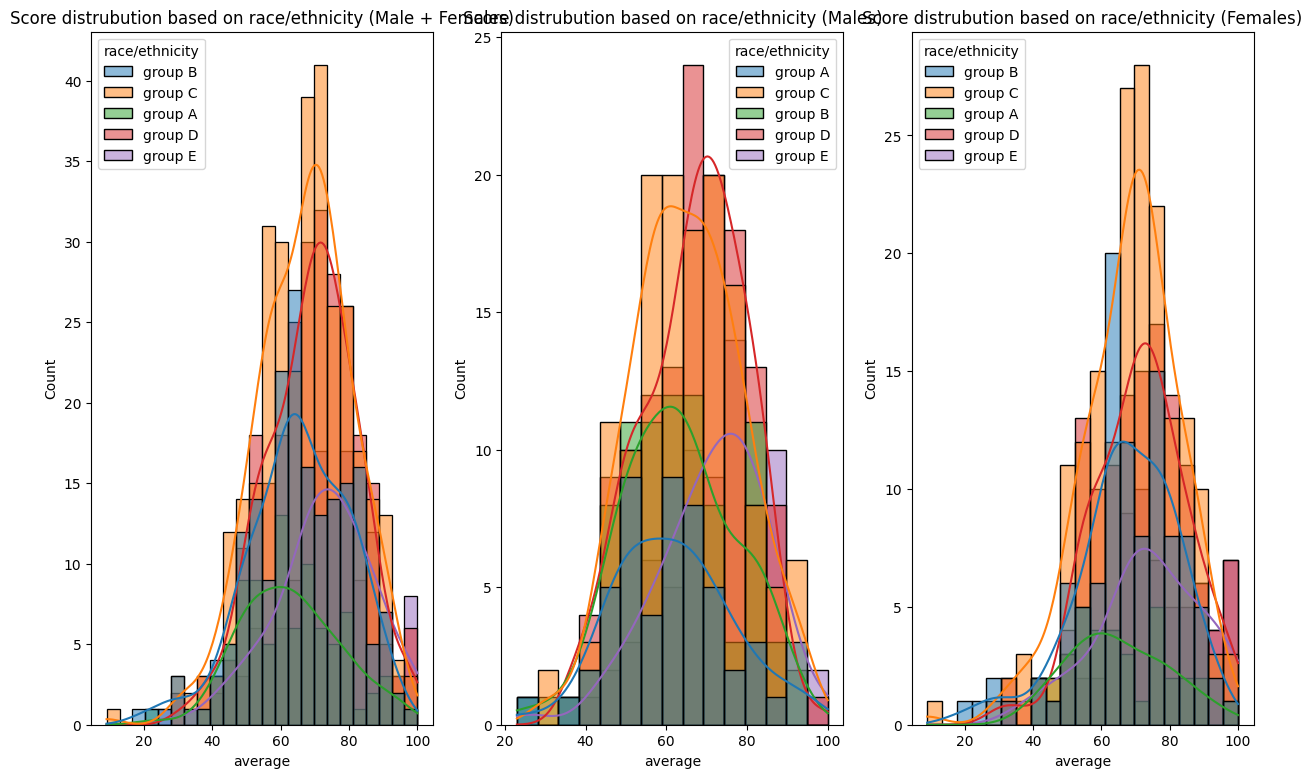

In [125]:
plt.subplots(1,3, figsize = (15,9))
plt.subplot(1,3,1)
ax = sns.histplot(data = df, x = 'average', kde=True, hue='race/ethnicity')
ax.set_title('Score distrubution based on race/ethnicity (Male + Females)')
plt.subplot(1,3,2)
ax = sns.histplot(data = df[df['gender']=='male'], x = 'average', kde=True, hue='race/ethnicity')
ax.set_title('Score distrubution based on race/ethnicity (Males)')
plt.subplot(1,3,3)
ax = sns.histplot(data = df[df['gender']=='female'], x = 'average', kde=True, hue='race/ethnicity')
ax.set_title('Score distrubution based on race/ethnicity (Females)')
plt.show()

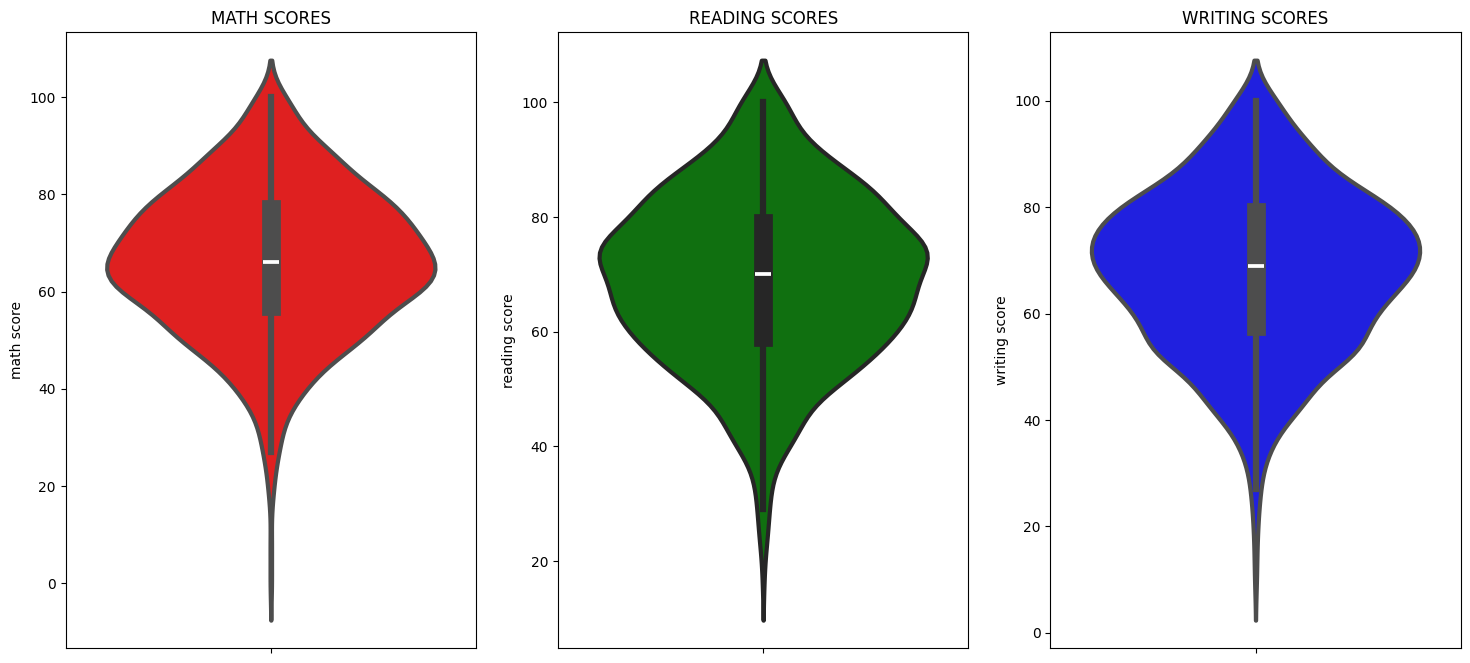

In [126]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

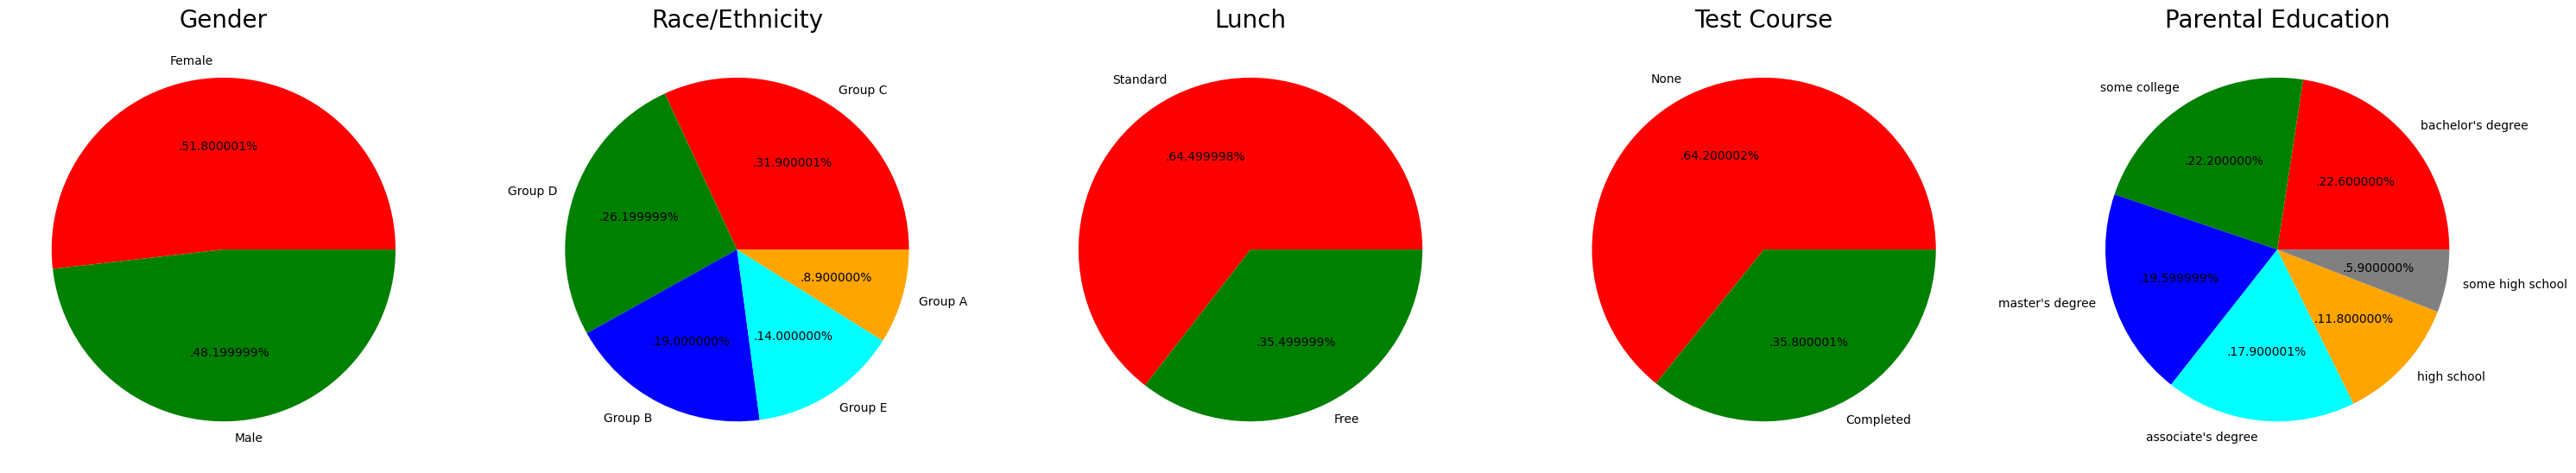

In [127]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = df['parental level of education'].unique()
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Univariate Analysis (gender)

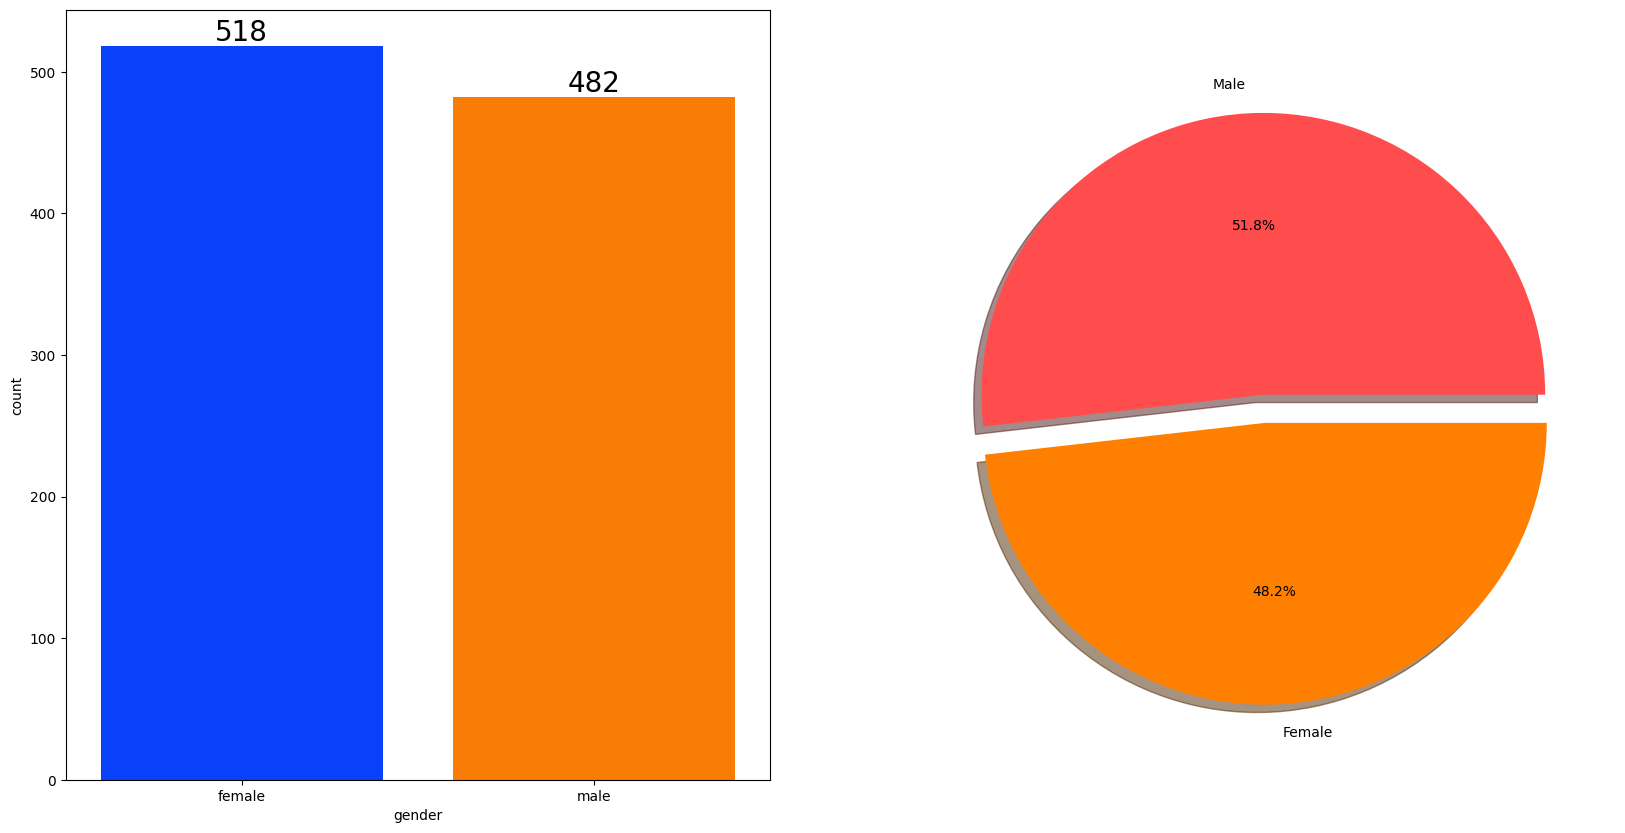

In [128]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# Bivariate Analysis (race/ethnicity)

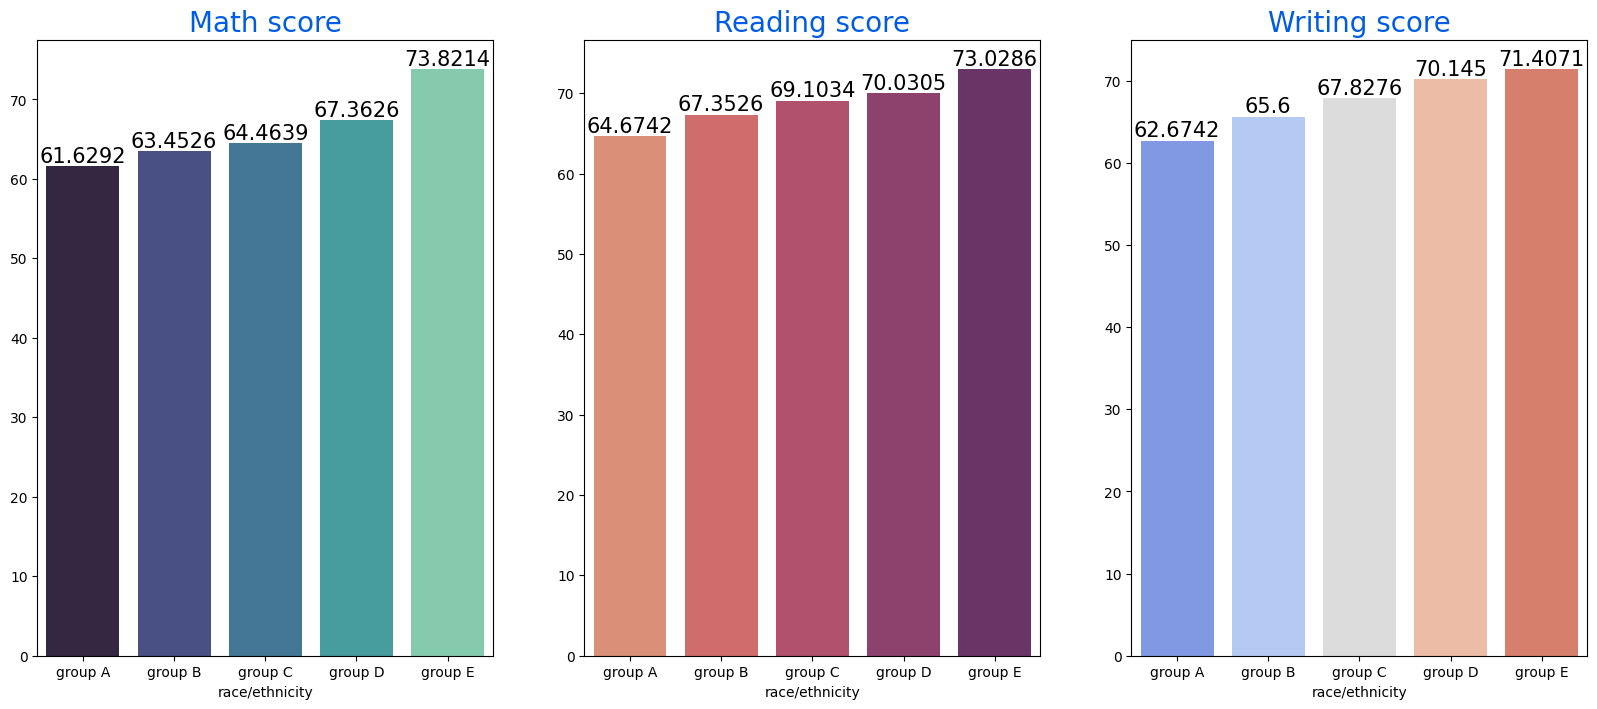

In [131]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)